In [164]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [88]:
data=pd.read_csv("D:\ISI 2025\Class\Subjects\Machine Learning\spine (1).csv")

data.head()

,Unnamed: 0,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,predicted_class
0,1,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,2,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,3,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,4,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,5,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [94]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [95]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
predicted_class             0
dtype: int64

In [96]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [97]:
data.iloc[:,0:-1]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171
...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192


In [98]:
# Standardize the data

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data.iloc[:,0:-1])

scaled_df=pd.DataFrame(scaled_data,columns=data.iloc[:,0:-1].columns)
scaled_df['predicted_class']=data['predicted_class']

scaled_df


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,predicted_class
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.744554,0.186396,0.610506,0.845115,0.156861,0.977797,Abnormal
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.413783,0.197208,0.854170,0.996300,0.230878,0.243812,Abnormal
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.473750,0.666533,0.850409,0.983442,0.148026,0.327166,Abnormal
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.367741,0.556360,0.461461,0.448790,0.113989,0.316741,Abnormal
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.542524,0.957940,0.725757,0.188118,0.447450,0.479711,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858,0.127082,0.027469,0.627582,0.151828,0.462818,0.121589,Normal
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761,0.044890,0.409585,0.908287,0.005807,0.977325,0.987360,Normal
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437,0.078194,0.308878,0.530571,0.190503,0.919365,0.305550,Normal
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240,0.156719,0.259327,0.737006,0.278701,0.971491,0.715482,Normal


In [99]:
len(scaled_df.columns)

13

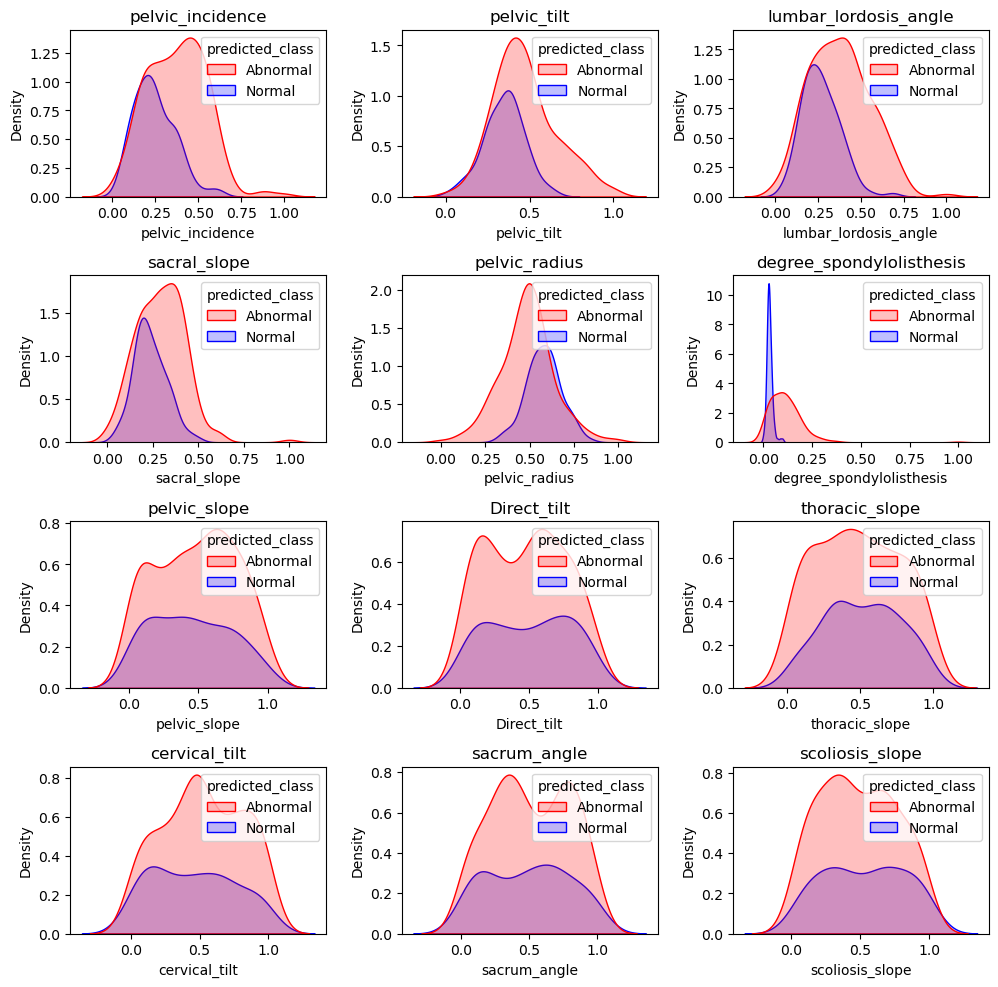

In [100]:
# List of features to plot
features = scaled_df.columns[:-1]
palette = {"Normal": 'blue', 'Abnormal': 'red'}

# Loop to plot KDE for each feature
plt.figure(figsize=(10, 12))
for i, feature in enumerate(features,1):
    plt.subplot(5,3 , i)
    sns.kdeplot(data=scaled_df, x=feature, hue='predicted_class',fill=True, palette=palette)
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()

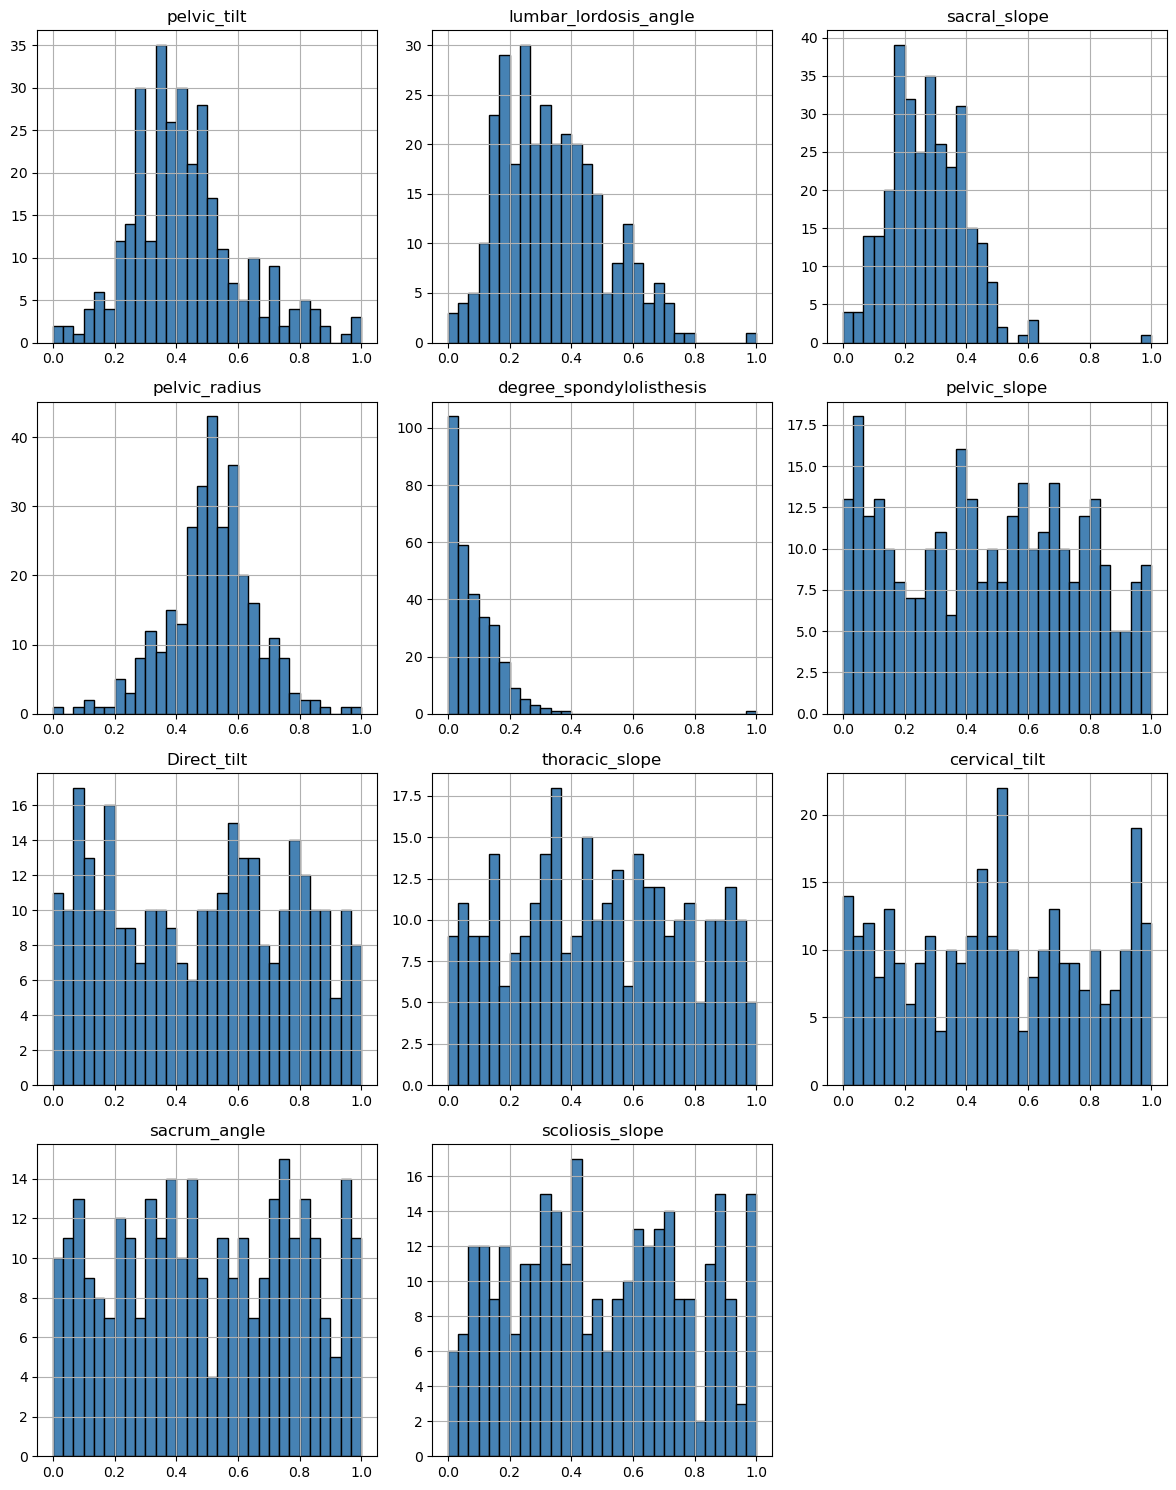

In [101]:
# Plot histograms for all features to see outliers

scaled_df.iloc[:,1:].hist(figsize=(12, 15), bins=30, color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

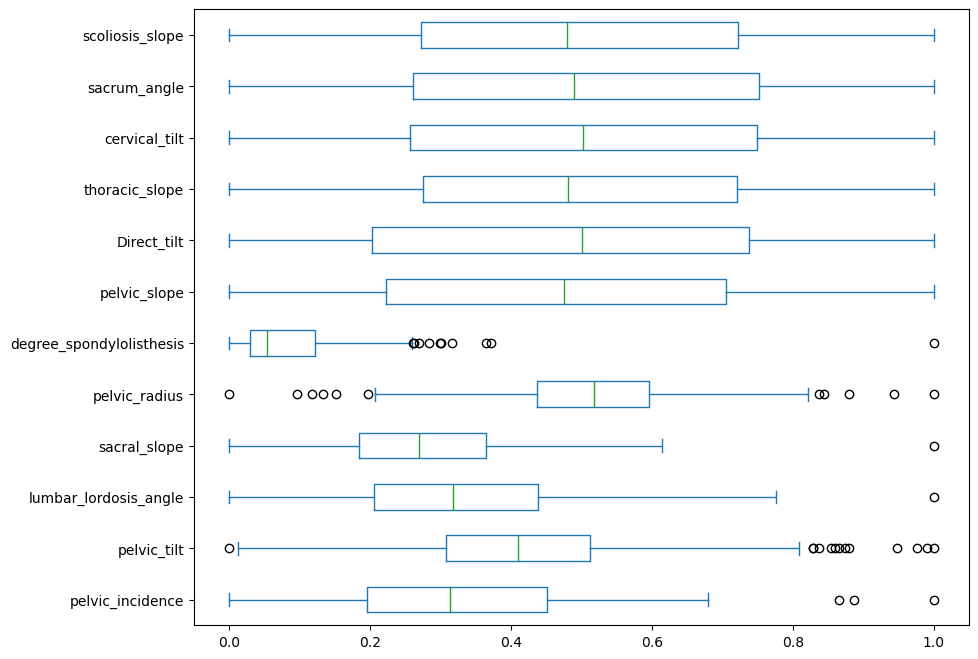

In [102]:
# Boxplot

scaled_df.plot(kind='box', figsize=(10, 8), vert=False)
plt.show()

In [108]:
scaled_df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'predicted_class'],
      dtype='object')

In [112]:
# To remove outliers

def remove_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

Outlier_cols=['degree_spondylolisthesis','pelvic_radius','sacral_slope','lumbar_lordosis_angle','pelvic_tilt','pelvic_incidence']
for col in Outlier_cols:
    scaled_df = remove_outliers_iqr(scaled_df, col)

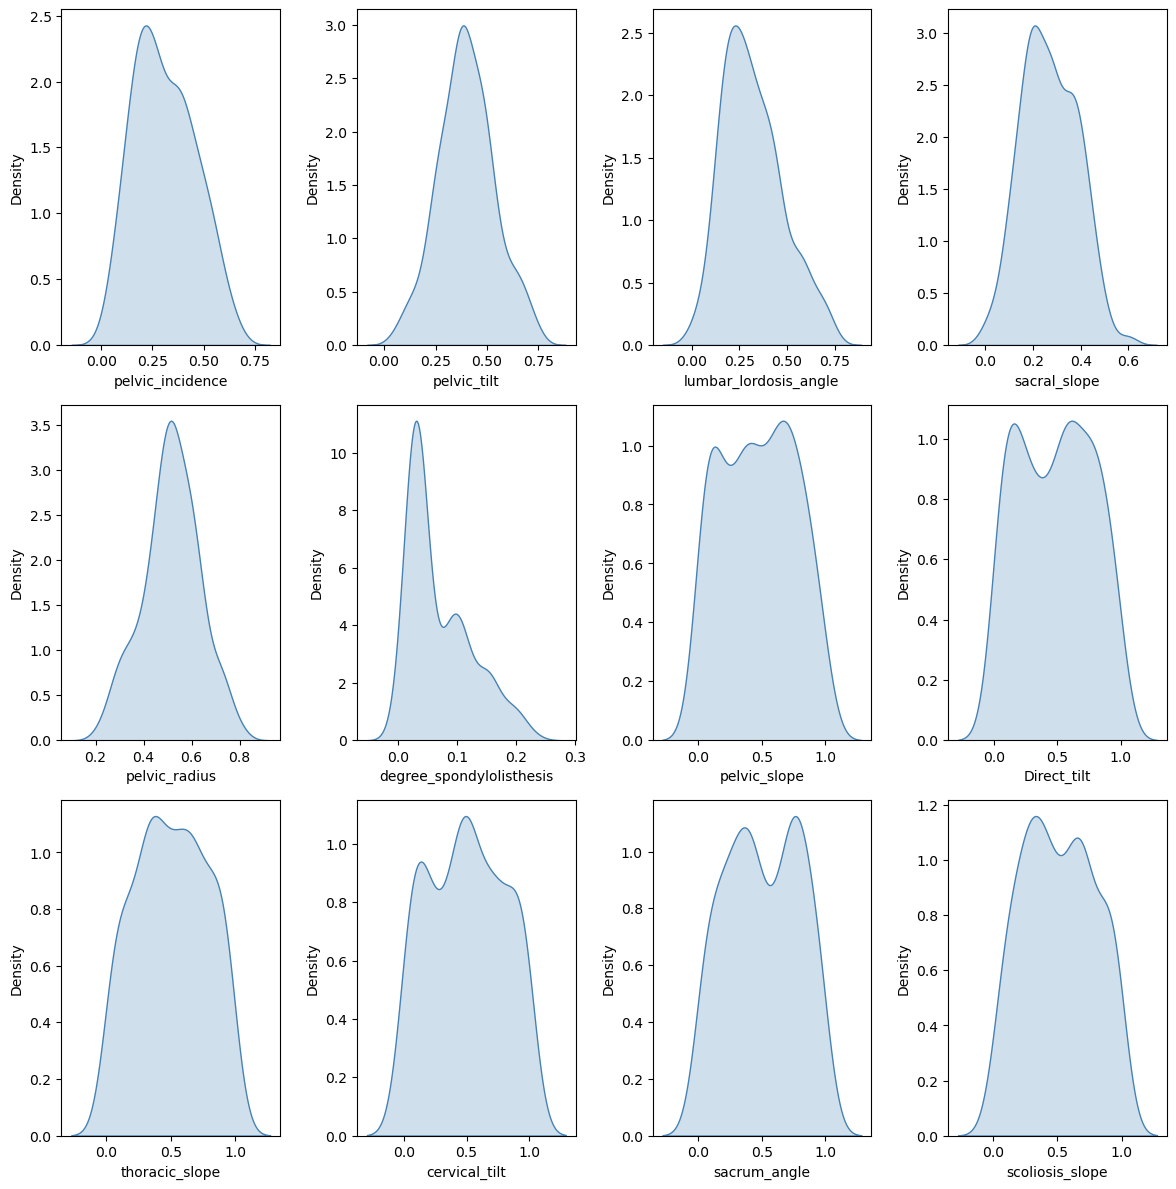

In [126]:
# Create subplots
plt.figure(figsize=(12, 12))

# Loop through each column and plot
for i, column in enumerate(scaled_df.iloc[:, :-1].columns, 1):
    plt.subplot(3, 4, i)  # Auto grid size
    sns.kdeplot(scaled_df.iloc[:,:-1][column], fill=True, color='steelblue')

plt.tight_layout()
plt.show()

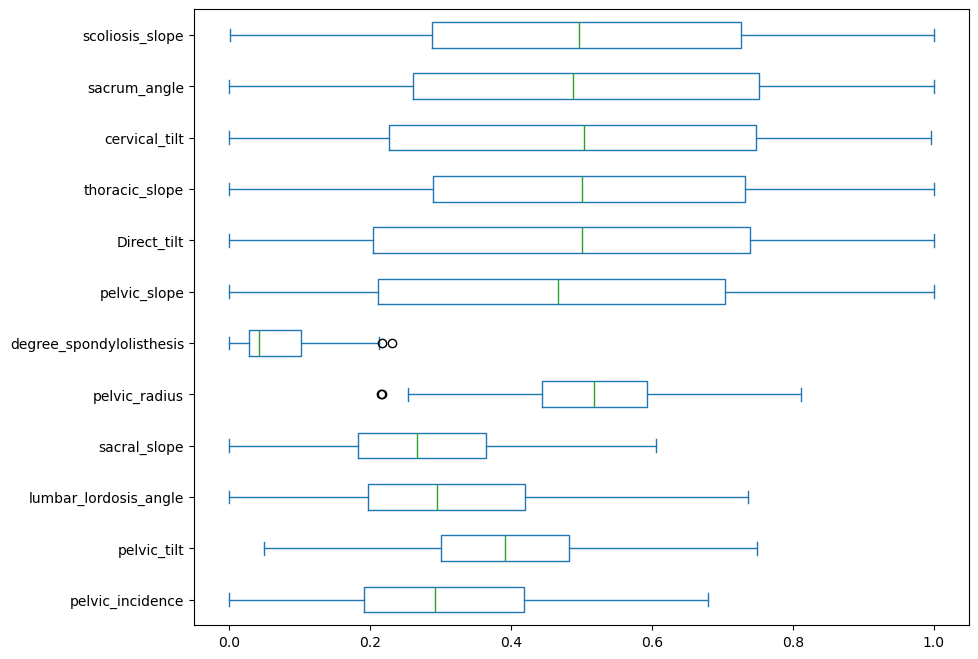

In [127]:
# Boxplot

scaled_df.plot(kind='box', figsize=(10, 8), vert=False)
plt.show()

In [131]:
df=scaled_df

df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,predicted_class
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.744554,0.186396,0.610506,0.845115,0.156861,0.977797,Abnormal
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.413783,0.197208,0.854170,0.996300,0.230878,0.243812,Abnormal
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.473750,0.666533,0.850409,0.983442,0.148026,0.327166,Abnormal
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.367741,0.556360,0.461461,0.448790,0.113989,0.316741,Abnormal
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.542524,0.957940,0.725757,0.188118,0.447450,0.479711,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858,0.127082,0.027469,0.627582,0.151828,0.462818,0.121589,Normal
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761,0.044890,0.409585,0.908287,0.005807,0.977325,0.987360,Normal
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437,0.078194,0.308878,0.530571,0.190503,0.919365,0.305550,Normal
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240,0.156719,0.259327,0.737006,0.278701,0.971491,0.715482,Normal


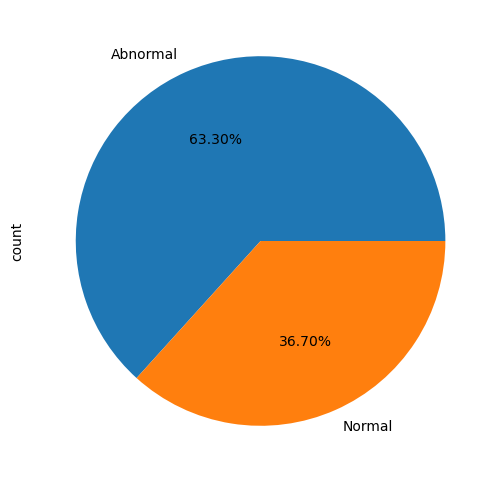

In [162]:
# Check the dataset is balanced or not

df['predicted_class'].value_counts().plot.pie(autopct='%.2f%%', figsize=(6, 6))
plt.show()

-----------

In [135]:
# Train Test Split

# Define features (X) and target (y)
X = df.drop('predicted_class', axis=1)  # Replace 'target_column' with your actual target
y = df['predicted_class']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

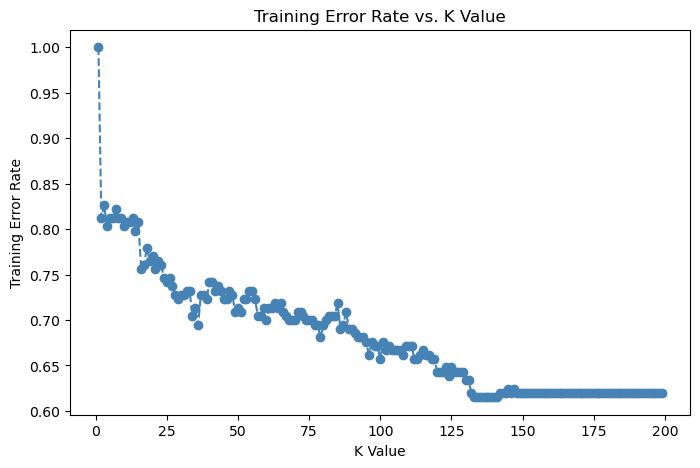

In [153]:
# KNN Algorithm

# Track errors for different k values
error_rates = []

# Test different values of k
for k in range(1, 200): 
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(X_train, y_train)  # Train the model
    y_train_pred = knn.predict(X_train)  # Predictions on training data
    Training_error_rate = accuracy_score(y_train, y_train_pred)  # Training error
    error_rates.append(Training_error_rate)

# Plotting the error rates
plt.figure(figsize=(8, 5))
plt.plot(range(1, 200), error_rates, marker='o', linestyle='--', color='steelblue')
plt.title('Training Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Training Error Rate')
plt.show()


Accuracy: 0.69


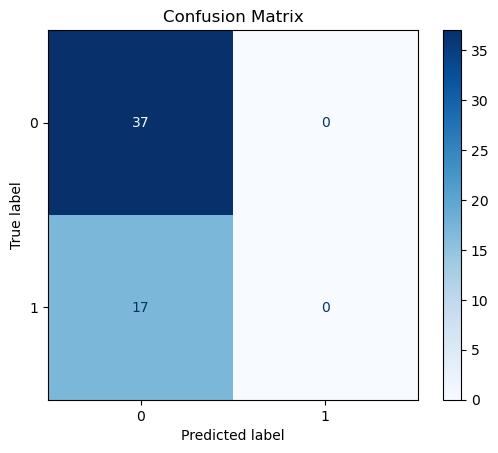

In [167]:
# taking k==130

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=130,metric='manhattan')

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Accuracy can change with distance metrics?

Accuracy: 0.76


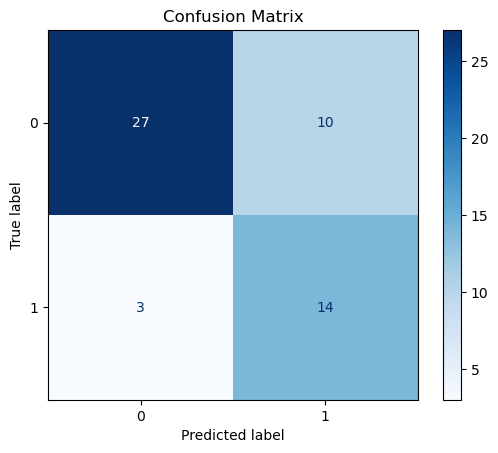

In [168]:
# Can apply Neive Base when not normal?

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

--------------------------

In [170]:
# Balaqnce the data

from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(
    df.drop('predicted_class', axis=1), 
    df['predicted_class']
)

#Combine back into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['predicted_class'] = y_resampled

df_resampled

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,predicted_class
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.744554,0.186396,0.610506,0.845115,0.156861,0.977797,Abnormal
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.413783,0.197208,0.854170,0.996300,0.230878,0.243812,Abnormal
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.473750,0.666533,0.850409,0.983442,0.148026,0.327166,Abnormal
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.367741,0.556360,0.461461,0.448790,0.113989,0.316741,Abnormal
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.542524,0.957940,0.725757,0.188118,0.447450,0.479711,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.209239,0.308160,0.216046,0.220042,0.612621,0.014889,0.869996,0.104889,0.623148,0.953964,0.294994,0.889750,Normal
334,0.078715,0.171312,0.142977,0.165704,0.622587,0.021690,0.489318,0.098154,0.341846,0.498773,0.760626,0.171070,Normal
335,0.193656,0.325575,0.170459,0.196067,0.615701,0.027582,0.757308,0.830240,0.608409,0.698646,0.692029,0.283953,Normal
336,0.384325,0.476398,0.356067,0.300872,0.449233,0.027010,0.441918,0.608118,0.457648,0.057854,0.625666,0.254439,Normal


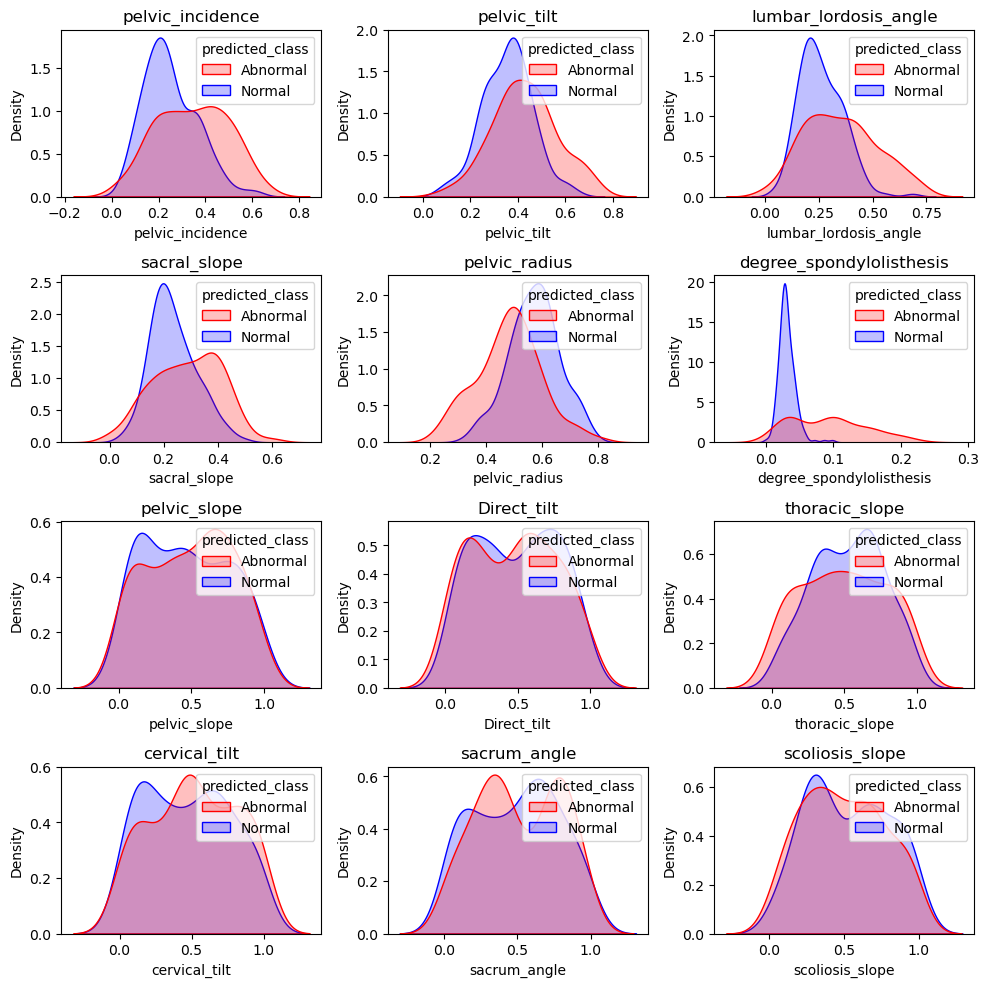

In [176]:
# List of features to plot
features = df_resampled.columns[:-1]
palette = {"Normal": 'blue', 'Abnormal': 'red'}

# Loop to plot KDE for each feature
plt.figure(figsize=(10, 12))
for i, feature in enumerate(features,1):
    plt.subplot(5,3 , i)
    sns.kdeplot(data=df_resampled, x=feature, hue='predicted_class',fill=True, palette=palette)
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()

In [171]:
# Train Test Split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

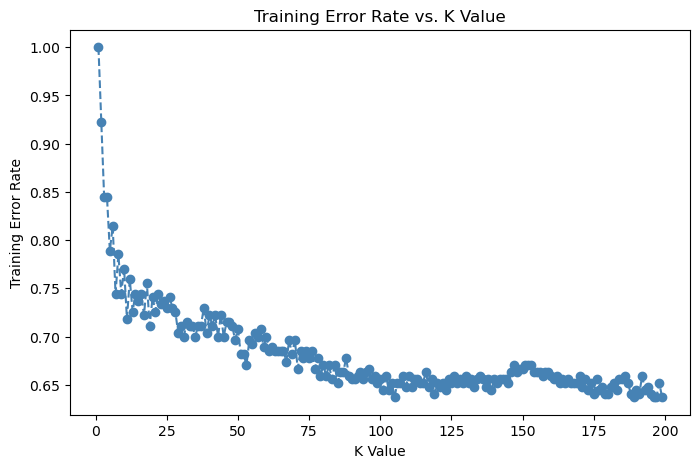

In [172]:
# KNN Algorithm

# Track errors for different k values
error_rates = []

# Test different values of k
for k in range(1, 200): 
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(X_train, y_train)  # Train the model
    y_train_pred = knn.predict(X_train)  # Predictions on training data
    Training_error_rate = accuracy_score(y_train, y_train_pred)  # Training error
    error_rates.append(Training_error_rate)

# Plotting the error rates
plt.figure(figsize=(8, 5))
plt.plot(range(1, 200), error_rates, marker='o', linestyle='--', color='steelblue')
plt.title('Training Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Training Error Rate')
plt.show()

Accuracy: 0.66


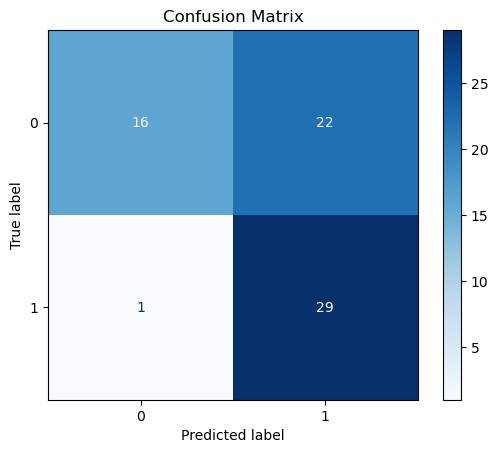

In [174]:
# taking k==108

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=108,metric='manhattan')

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.82


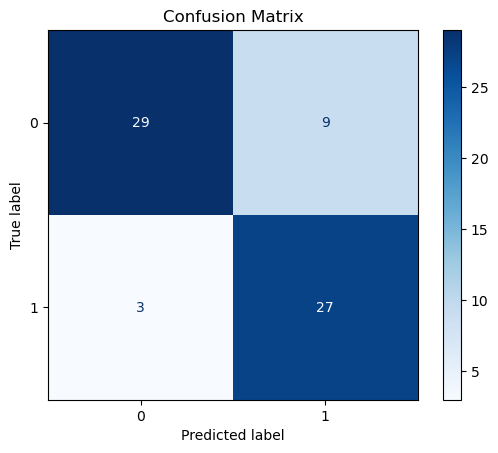

In [175]:
# Can apply Neive Base when not normal?

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

----------------------

In [ ]:
# Distance mean classifier

---------------------

In [ ]:
# What features can we remove after balancing?
# What can be done with degree_spondylolisthesis?

-------------------

In [ ]:
#PCA

--------------------------

In [ ]:
#LDA

------

In [ ]:
# other Feature engineering technique, hyper parametr tuning,EDA